In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab
import sys
# read data
# list 2-1 Sizing up a new data set
with open("C:/Users/64162/Desktop/HY_Universe_corporate bond.csv") as df:
#arrange data into list for labels and list of lists for attributes
    xList = []
    labels = []
    next(df)
    for line in df:
    #split on comma
        row = line.strip().split(",")
        xList.append(row)
sys.stdout.write("Number of Rows of Data = " + str(len(xList)) + '\n')
sys.stdout.write("Number of Columns of Data = " + str(len(xList[1])))
print ("\n")

Number of Rows of Data = 2721
Number of Columns of Data = 37



In [2]:
# Read the data set to a pandas dataframe
HYCB = pd.read_csv('HY_Universe_corporate bond.csv')
HYCB.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades,bond_type
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1,5
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3,2
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,...,0.115207,0.594470,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1,5
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,...,0.426332,0.892462,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1,3
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1,5


In [3]:
#list 2-2 determining the nature of attributes
#arrange data into list for labels and list of lists for attributes

nrow = len(xList)
ncol = len(xList[1])

type = [0]*3
colCounts = []

for col in range(ncol):
    for row in xList:
        try:
            a = float(row[col])
            if isinstance(a, float):
                type[0] += 1
        except ValueError:
            if len(row[col]) > 0:
                type[1] += 1
            else:
                type[2] += 1

    colCounts.append(type)
    type = [0]*3

sys.stdout.write("Col#" + '\t' + "Number" + '\t' +
                 "Strings" + '\t ' + "Other\n")
iCol = 0
for types in colCounts:
    sys.stdout.write(str(iCol) + '\t\t' + str(types[0]) + '\t\t' +
                     str(types[1]) + '\t\t' + str(types[2]) + "\n")
    iCol += 1
print ("\n")

Col#	Number	Strings	 Other
0		0		2721		0
1		0		2721		0
2		0		2721		0
3		0		2721		0
4		1757		964		0
5		161		2560		0
6		186		2535		0
7		1170		1551		0
8		41		2680		0
9		2721		0		0
10		2721		0		0
11		0		2721		0
12		0		2721		0
13		2721		0		0
14		0		2721		0
15		2721		0		0
16		2721		0		0
17		2721		0		0
18		2721		0		0
19		0		2721		0
20		2721		0		0
21		2721		0		0
22		2721		0		0
23		2721		0		0
24		2721		0		0
25		2721		0		0
26		2721		0		0
27		2721		0		0
28		2721		0		0
29		2721		0		0
30		2721		0		0
31		2721		0		0
32		2721		0		0
33		2721		0		0
34		2721		0		0
35		2721		0		0
36		2721		0		0




In [4]:
HYCB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 37 columns):
CUSIP                         2721 non-null object
Ticker                        2721 non-null object
Issue Date                    2721 non-null object
Maturity                      2721 non-null object
1st Call Date                 2721 non-null object
Moodys                        2721 non-null object
S_and_P                       2721 non-null object
Fitch                         2721 non-null object
Bloomberg Composite Rating    2721 non-null object
Coupon                        2721 non-null float64
Issued Amount                 2721 non-null float64
Maturity Type                 2721 non-null object
Coupon Type                   2721 non-null object
Maturity At Issue months      2721 non-null float64
Industry                      2721 non-null object
LiquidityScore                2721 non-null float64
Months in JNK                 2721 non-null object
Months in HYG         

In [5]:
# Set CUSIP as the index of the dataframe
HYCB.set_index('CUSIP',inplace=True)
HYCB.head()

,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,Issued Amount,...,percent_intra_dealer,percent_uncapped,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades,bond_type
CUSIP,,,,,,,,,,,,,,,,,,,,,
000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,405000000.0,...,0.006645,0.292359,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1,5
00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,499285000.0,...,0.425018,0.974071,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3,2
00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,460000000.0,...,0.115207,0.594470,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1,5
00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,500000000.0,...,0.426332,0.892462,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1,3
00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,400000000.0,...,0.157216,0.690722,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1,5


In [6]:
#list 2-3 Summary Statistics for Numeric and Categorical Attributes
#generate summary statistics for column 3 (e.g.)
col = 9
colData = []
for row in xList:
    colData.append(float(row[col]))

colArray = np.array(colData)
colMean = np.mean(colArray)
colsd = np.std(colArray)
sys.stdout.write("Mean = " + '\t' + str(colMean) + '\t\t' +
            "Standard Deviation = " + '\t ' + str(colsd) + "\n")

Mean = 	10.30787210584344		Standard Deviation = 	 63.0397949327223


In [7]:
#calculate quantile boundaries
ntiles = 4
percentBdry = []
for i in range(ntiles+1):
    percentBdry.append(np.percentile(colArray, i*(100)/ntiles))
sys.stdout.write("\nBoundaries for 4 Equal Percentiles \n")
print(percentBdry)
sys.stdout.write(" \n")


Boundaries for 4 Equal Percentiles 
[0.0, 5.0, 6.25, 7.75, 999.0]
 


In [8]:
#run again with 10 equal intervals
ntiles = 10
percentBdry = []
for i in range(ntiles+1):
    percentBdry.append(np.percentile(colArray, i*(100)/ntiles))
sys.stdout.write("Boundaries for 10 Equal Percentiles \n")
print(percentBdry)
sys.stdout.write(" \n")

Boundaries for 10 Equal Percentiles 
[0.0, 2.95, 4.63, 5.25, 5.75, 6.25, 6.83, 7.5, 8.13, 9.38, 999.0]
 


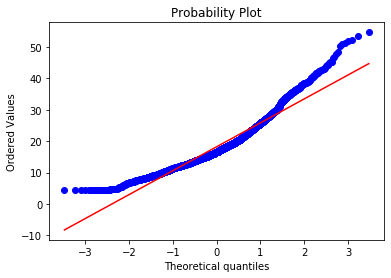

In [9]:
#2-4 Quantile-Quantile Plot
import pylab
import scipy.stats as stats
#LiquidityScore
col = 15
colData = []
for row in xList:
    colData.append(float(row[col]))
stats.probplot(colData, dist="norm", plot=pylab)
pylab.show()

In [10]:
#2-5 Read and Summarize
import pandas as pd
from pandas import DataFrame
df_2 = pd.read_csv("C:/Users/64162/Desktop/HY_Universe_corporate bond.csv",prefix="W")
print(df_2.head())
print(df_2.tail())
#print summary of data frame
summary = df_2.describe()
print(summary)

       CUSIP  Ticker  Issue Date    Maturity 1st Call Date Moodys S_and_P  \
0  000324AA1  FLECIN    7/1/2014    7/1/2019    10/23/2017    Nan     Nan   
1  00080QAB1     RBS   3/15/2004    6/4/2018           Nan    Ba1     BB+   
2  00081TAD0    ACCO   5/14/2010   3/15/2015           Nan     WR      NR   
3  00081TAH1    ACCO   6/17/2013   4/30/2020           Nan     WR      NR   
4  00081TAJ7    ACCO  12/22/2016  12/15/2024    12/15/2019     B1     BB-   

  Fitch Bloomberg Composite Rating  Coupon  ...  percent_intra_dealer  \
0   Nan                        Nan   12.00  ...              0.006645   
1   BBB                        BB+    4.65  ...              0.425018   
2   BB+                         NR   10.63  ...              0.115207   
3    WD                         NR    6.75  ...              0.426332   
4    BB                        BB-    5.25  ...              0.157216   

  percent_uncapped Client_Trade_Percentage  weekly_mean_volume  \
0         0.292359              

   Coupon  Issued Amount  Maturity At Issue months  LiquidityScore  LIQ SCORE  \
0   12.00    405000000.0                     60.87       10.891365   0.108914   
1    4.65    499285000.0                    173.13       24.625486   0.246255   
2   10.63    460000000.0                     58.87       12.841557   0.128416   
3    6.75    500000000.0                     83.63       26.226355   0.262264   
4    5.25    400000000.0                     97.17       14.138395   0.141384   

   n_trades  volume_trades  total_median_size  total_mean_size  n_days_trade  \
0       301   2.640038e+08          1000000.0      877088.9535           128   
1      2854   2.668630e+08            24000.0       93504.9054           614   
2       434   2.814210e+08           875000.0      648435.4839           183   
3      4975   1.163167e+09            26000.0      233802.4121           773   
4       388   2.493420e+08           750000.0      642634.0206           126   

   ...  percent_intra_dealer  pe

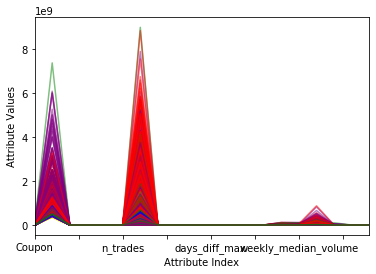

In [11]:
#2-6 Parallel Coordinates Graph for real Attribute Visualization
# take the value from
df_3 = df_2.drop(['CUSIP','Ticker','Issue Date','Maturity','1st Call Date','Moodys','S_and_P',
              'Fitch','Bloomberg Composite Rating','Maturity Type','Coupon Type','Industry',
              'Months in JNK','Months in HYG','Months in Both','IN_ETF'],axis=1)
print(df_3.head())
cols = list(df_3)
#cols.insert(20,cols.pop(cols.index('bond_type')))
pcolor = []
import matplotlib.pyplot as plot

for row in range(nrow):
    if df_3.iat[row,20] == 1:
        pcolor = "red"
    elif df_3.iat[row,20] == 2:
        pcolor = "blue"
    elif df_3.iat[row,20] == 3:
        pcolor = "green"
    elif df_3.iat[row, 20] == 4:
        pcolor = "yellow"
    elif df_3.iat[row, 20] == 5:
        pcolor = "purple"
    # plot rows of data as if they were series data
    dataRow = df_3.iloc[row, 0:20]
    dataRow.plot(color=pcolor, alpha=0.5)
plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()

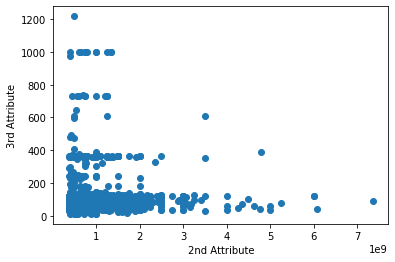

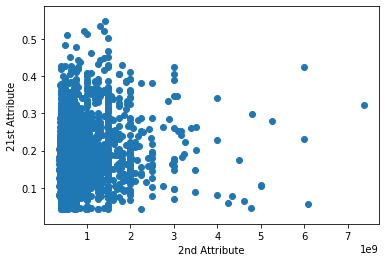

In [12]:
#2-7 Cross Plotting Pairs of Attributes
dataRow2 = df_3.iloc[0:nrow,1]
dataRow3 = df_3.iloc[0:nrow,2]
plot.scatter(dataRow2,dataRow3)
plot.xlabel("2nd Attribute")
plot.ylabel(("3rd Attribute"))
plot.show()
dataRow5 = df_3.iloc[0:nrow,4]
plot.scatter(dataRow2, dataRow5)
plot.xlabel("2nd Attribute")
plot.ylabel(("21st Attribute"))
plot.show()

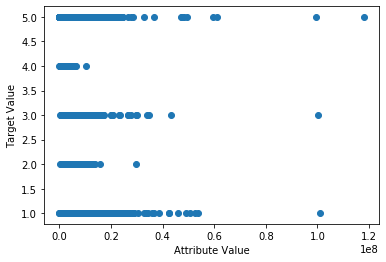

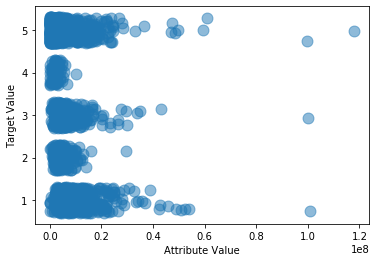

In [13]:
# 2-8 Correlation between Classification Target and Real Attribute
target = []
for row in range(nrow):
    if df_3.iat[row,20] == 1:
        target.append(1.0)
    elif df_3.iat[row,20] == 2:
        target.append(2.0)
    elif df_3.iat[row,20] == 3:
        target.append(3.0)
    elif df_3.iat[row, 20] == 4:
        target.append(4.0)
    elif df_3.iat[row, 20] == 5:
        target.append(5.0)

#plot 16th
dataRow16 = df_3.iloc[0:nrow,15]
plot.scatter(dataRow16,target)
plot.xlabel("Attribute Value")
plot.ylabel("Target Value")
plot.show()
#To improve the visualization, this version dithers the points a little
# and makes them somewhat transparent
from random import uniform
target = []
for row in range(nrow):
    if df_3.iat[row,20] == 1:
        target.append(1.0+ uniform(-0.3, 0.3))
    elif df_3.iat[row,20] == 2:
        target.append(2.0+ uniform(-0.3, 0.3))
    elif df_3.iat[row,20] == 3:
        target.append(3.0+ uniform(-0.3, 0.3))
    elif df_3.iat[row, 20] == 4:
        target.append(4.0+ uniform(-0.3, 0.3))
    elif df_3.iat[row, 20] == 5:
        target.append(5.0+ uniform(-0.3, 0.3))

dataRow16 = df_3.iloc[0:nrow,15]
plot.scatter(dataRow16,target, alpha=0.5, s=120)
plot.xlabel("Attribute Value")
plot.ylabel("Target Value")
plot.show()

In [14]:
#2-9 Pearson's Correlation Calculation for Attribute 2 vs Attribute 3 & 2 vs 16
from math import sqrt
mean2 = 0.0; mean3 = 0.0; mean16 = 0.0
numElt = len(dataRow2)
for i in range(numElt):
    mean2 += dataRow2[i]/numElt
    mean3 += dataRow3[i]/numElt
    mean16 += dataRow16[i]/numElt

var2 = 0.0; var3 = 0.0; var21 = 0.0
for i in range(numElt):
    var2 += (dataRow2[i] - mean2) * (dataRow2[i] - mean2)/numElt
    var3 += (dataRow3[i] - mean3) * (dataRow3[i] - mean3)/numElt
    var21 += (dataRow16[i] - mean16) * (dataRow16[i] - mean16)/numElt

corr16 = 0.0; corr116 = 0.0
for i in range(numElt):
    corr16 += (dataRow2[i] - mean2) * \
              (dataRow3[i] - mean3) / (sqrt(var2*var3) * numElt)
    corr116 += (dataRow2[i] - mean2) * \
               (dataRow16[i] - mean16) / (sqrt(var2*var21) * numElt)

sys.stdout.write("Correlation between attribute 2 and 3 \n")
print(corr16)
sys.stdout.write(" \n")

sys.stdout.write("Correlation between attribute 2 and 21 \n")
print(corr116)
sys.stdout.write(" \n")

Correlation between attribute 2 and 3 
0.008601025231344426
 
Correlation between attribute 2 and 21 
0.39694676605230594
 


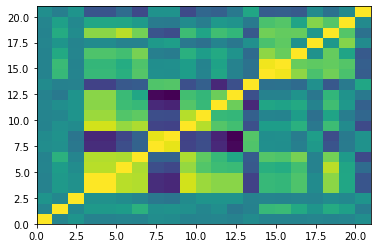

In [15]:
#2-10 Presenting Attribute Correlations Visually
#calculate correlations between real-valued attributes

corMat = DataFrame(df_2.corr())

#visualize correlations using heatmap
plot.pcolor(corMat)
plot.show()

In [16]:
print("-------------------------------------------------------------------------")
print("My name is Xu Zhang")
print("My NetID is: 'xuz4'")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

-------------------------------------------------------------------------
My name is Xu Zhang
My NetID is: 'xuz4'
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
